In [1]:
# import the necessary libraries
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import nltk.corpus
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


In [38]:
df = pd.read_csv("review_rating.csv")
df

,Unnamed: 0,review,rating
0,0,Did not meet expectations:\nTakes significant ...,3
1,1,This laptop is great in terms of how light wei...,1
2,2,First day of using this laptop\nIt’s damn fast...,5
3,3,Play Video\n Pros\n-----\n- Very light weight\...,2
4,4,Play Video\n This really serves the purpose. I...,5
...,...,...,...
25404,12804,Using with BSNL. Speed is good compare with mo...,5
25405,12805,"Well, this product is awesome but configuratio...",5
25406,12806,"Router is good, solve the problem and you can ...",5
25407,12807,It's just been 2 days since I've started using...,4


read the csv file

In [39]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

dropped the unnecessary column

In [40]:
df.replace('\n','').head()

,review,rating
0,Did not meet expectations:\nTakes significant ...,3
1,This laptop is great in terms of how light wei...,1
2,First day of using this laptop\nIt’s damn fast...,5
3,Play Video\n Pros\n-----\n- Very light weight\...,2
4,Play Video\n This really serves the purpose. I...,5


print the first five rows 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25409 entries, 0 to 25408
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25308 non-null  object
 1   rating  25409 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 397.1+ KB


checked the information of dataframe.

In [42]:
df.isnull().sum()

review    101
rating      0
dtype: int64

checked the null values 

In [43]:
df = df.dropna()

dropped the null values

In [44]:
review = df['review'][0:4000]
rating = df['rating'][0:4000]

taking sample rows from the dataframe

In [45]:
df = pd.DataFrame({'review':review,
                  'rating':rating})
df

,review,rating
0,Did not meet expectations:\nTakes significant ...,3
1,This laptop is great in terms of how light wei...,1
2,First day of using this laptop\nIt’s damn fast...,5
3,Play Video\n Pros\n-----\n- Very light weight\...,2
4,Play Video\n This really serves the purpose. I...,5
...,...,...
4042,After using an Boult earphone and experienced ...,1
4043,It's a superior quality headphones.. awesome b...,3
4044,"Hi Team,\n\nRecently I purchased product from ...",1
4045,In ordered this product as I need to take call...,3


created new dataframe with sliced list

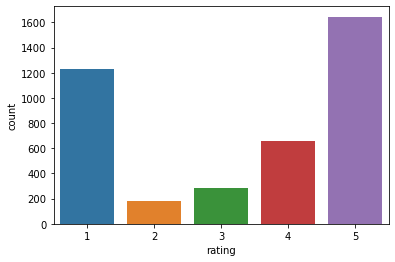

In [46]:
sns.countplot(df['rating'])
plt.show()

plotting the rating in a graph

In [47]:
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
df['review'] = df['review'].apply(punc_clean)
df.head(2)

,review,rating
0,Did not meet expectations\nTakes significant t...,3
1,This laptop is great in terms of how light wei...,1


removed punctuation from the dataframe

In [49]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
df['review'] = df['review'].apply(remove_stopword)

removed stop words from the dataframe

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectr = TfidfVectorizer(ngram_range=(1,3),min_df=1)
vectr.fit(df['review'])
vect_X = vectr.transform(df['review'])

transformed the review column

In [51]:
x = vect_X
y = df['rating']

splited the data into x and y

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 0)

splitted the data into train_test_split

In [53]:
# imported machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [54]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
model = [lr,rfc,dt,knn]

for i in model:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    print('Training score',i.score(xtrain,ytrain))
    print('Testing score',i.score(xtest,ytest))
    print('Accuracy score of',i,'is',accuracy_score(ytest,pred))
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))

Training score 0.8709375
Testing score 0.74875
Accuracy score of LogisticRegression() is 0.74875
[[220   0   0   1  25]
 [  7   3   0   0  25]
 [  9   0   9   1  37]
 [  4   0   0  42  79]
 [ 10   0   0   3 325]]
              precision    recall  f1-score   support

           1       0.88      0.89      0.89       246
           2       1.00      0.09      0.16        35
           3       1.00      0.16      0.28        56
           4       0.89      0.34      0.49       125
           5       0.66      0.96      0.78       338

    accuracy                           0.75       800
   macro avg       0.89      0.49      0.52       800
weighted avg       0.80      0.75      0.71       800

Training score 0.98625
Testing score 0.77
Accuracy score of RandomForestClassifier() is 0.77
[[215   0   0   3  28]
 [  5  11   0   0  19]
 [  9   1  22   2  22]
 [  3   0   0  49  73]
 [ 11   0   2   6 319]]
              precision    recall  f1-score   support

           1       0.88      0.87 

fit the xtrain and ytrain into various machine learning algorithms.

In [55]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x,y,cv =10)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.7204999999999999
cv score of RandomForestClassifier() is 0.74475
cv score of DecisionTreeClassifier() is 0.69475
cv score of KNeighborsClassifier() is 0.625


validating the testing score,seems like DecisionTree classifier working best, so we move ahead with DecisionTree.

## Hyperparameter tuning

In [68]:
param_grid = {'max_depth': [1,3,6,10,15,17,20,25,30],
              'criterion' : ["gini", "entropy"],
             'min_samples_leaf': [5,8,10,17,20,30,50,70,100],
             'ccp_alpha': [0.1, .01, .001,0.0001]}
dt = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 5}

In [69]:
dt2 = DecisionTreeClassifier(ccp_alpha = 0.001,
                              criterion = 'gini',
                              max_depth = 25,
                              min_samples_leaf = 5)
dt2.fit(xtrain,ytrain)
print('Training score',dt2.score(xtrain,ytrain))
print('Testing score',dt2.score(xtest,ytest))
pred = dt2.predict(xtest)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

Training score 0.7615625
Testing score 0.64125
[[184   6   2   5  49]
 [ 11   2   2   8  12]
 [ 10   1  14   7  24]
 [ 14   0   3  39  69]
 [ 18   1   5  40 274]]
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       246
           2       0.20      0.06      0.09        35
           3       0.54      0.25      0.34        56
           4       0.39      0.31      0.35       125
           5       0.64      0.81      0.72       338

    accuracy                           0.64       800
   macro avg       0.51      0.44      0.45       800
weighted avg       0.62      0.64      0.62       800



Text(0, 0.5, 'Predicted')

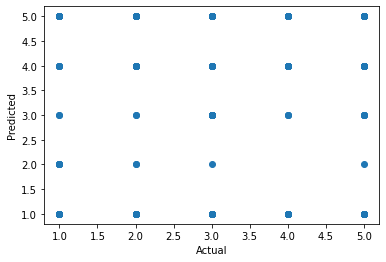

In [70]:
# checking out the differnce between actual and predicted values
plt.scatter(x = ytest,y = pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Now we dump the final output

In [ ]:
import pickle
filename = 'rating prediction.pkl'
pickle.dump(dt2,open(filename,'wb'))